In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import sys
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2
import pandas as pd
import os

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 422155448944656492
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3715713024
 locality {
   bus_id: 1
 }
 incarnation: 817332697773085365
 physical_device_desc: "device: 0, name: DML, pci bus id: <undefined>"
 xla_global_id: -1]

In [3]:
vgg16_pretrained = keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top = True,
    input_shape= (224,224,3)
)

In [4]:
print(vgg16_pretrained.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
#pip install pydot
#pip install graphviz

In [6]:
img_path='./images/airplane_1.jpg'
img = keras.preprocessing.image.load_img(img_path,target_size=(224,224))
x= keras.preprocessing.image.img_to_array(img)
x= np.expand_dims(x,axis=0) # 디멘션을 하나 더넣어줌으로 사진여러장을 한번에 학습가능
x= keras.applications.vgg16.preprocess_input(x)
print(img)
print(type(x))

<PIL.Image.Image image mode=RGB size=224x224 at 0x2E922FA4088>
<class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


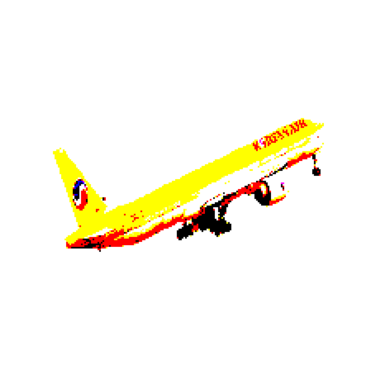

In [7]:
plt.imshow(x[0])
plt.axis('off')
plt.show()

In [8]:
output = vgg16_pretrained.predict(x)
classname=keras.applications.vgg16.decode_predictions(output,top=3)
print(output.mean())

print(np.argmax(output[0].flatten()))

1/1 [==============================] - 1s 814ms/step
0.0010000002
404


In [9]:
className=classname[0][0][1]
prob=classname[0][0][2]
print(className,prob)

airliner 0.93717927


In [10]:
import glob

# vgg16_pretrained = keras.applications.vgg16.VGG16(
#     weights = 'imagenet',
#     include_top = True,
#     input_shape = (224, 224, 3)
# )

def img_prep(x):
    x = keras.preprocessing.image.load_img(i, target_size=(224, 224))
    x = keras.preprocessing.image.img_to_array(x)
    x = np.expand_dims(x, axis = 0)
    x = keras.applications.vgg16.preprocess_input(x)
    return x
img_paths = glob.glob('./images/*')
display(img_paths)


['./images\\airplane_1.jpg', './images\\beagle.jpg', './images\\car1.jpg']

In [11]:


for i in img_paths:

    x = img_prep(i)
    output = vgg16_pretrained.predict(x)

    classNames = keras.applications.vgg16.decode_predictions(output, top = 3)
    className = classNames[0][0][1]
    prob = classNames[0][0][2]

    img_opencv = cv2.imread(i)
    text = f'{className}, {prob*100:.2f}%'
    cv2.putText(img_opencv, text, (10, 30), cv2.FONT_HERSHEY_COMPLEX, 0.8,
                (0, 0, 255), 1, cv2.LINE_AA)

    cv2.imshow('image', img_opencv)

    key = cv2.waitKey(3000)

    if key ==  27 or key == ord('q'):
        break

cv2.destroyAllWindows()

1/1 [==============================] - 0s 23ms/step


In [16]:
## Functional API
inputs=keras.Input(shape=(150,150,3))
Conv1=keras.layers.Conv2D(64,kernel_size=3,activation="relu")(inputs)
Conv2=keras.layers.Conv2D(32,kernel_size=3,activation="relu")(Conv1)
max_pool=keras.layers.MaxPool2D(pool_size=2)(Conv2)
flatten=keras.layers.Flatten()(max_pool)
dense1=keras.layers.Dense(120,activation="relu")(flatten)
drop_out=keras.layers.Dropout(0.3)(dense1)
dense2=keras.layers.Dense(32,activation="relu")(drop_out)
outputs=keras.layers.Dense(1,activation="sigmoid")(dense2)

alz_model=keras.Model(inputs=inputs,outputs=outputs)
alz_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 170528)            0         
                                                                 
 dense (Dense)               (None, 120)               20463480  
                                                             

In [17]:
def img_prep(x):
    x = keras.preprocessing.image.load_img(i, target_size=(150, 150))
    x = keras.preprocessing.image.img_to_array(x)
    x = np.expand_dims(x, axis = 0)
    x = keras.applications.vgg16.preprocess_input(x)
    return x
train = glob.glob('./train/ad/*')
display(img_paths)

['./images\\airplane_1.jpg', './images\\beagle.jpg', './images\\car1.jpg']

In [18]:
import glob

img_path_ad=glob.glob('./train/ad/*')+glob.glob('./test/ad/*')
img_path_normal=glob.glob('./train/normal/*')+glob.glob('./test/normal/*')
img_paths=img_path_normal+img_path_ad
target=np.array([1]*len(img_path_ad)+[0]*len(img_path_normal))

print(len(target))
imgs=np.zeros((0,150,150,3),np.float32)

for img_path in img_paths:
    img=cv2.imread(img_path)
    img=(img.astype(np.float32))/255.
    img=np.expand_dims(img,axis=0)
    imgs = np.append(imgs,img,axis=0)

print(imgs.shape)

280
(280, 150, 150, 3)


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(
    imgs,target,test_size=0.2,shuffle=True
)

print(X_train.shape,y_train.shape)


(224, 150, 150, 3) (224,)


In [20]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
alz_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
checkpoint=keras.callbacks.ModelCheckpoint(filepath='./alz_model.h5',
                                           save_best_only=True)
early_stop=keras.callbacks.EarlyStopping(patience=10)

In [23]:

history=alz_model.fit(X_train,y_train,epochs=100,
                      batch_size=20,
                      validation_data=(X_val,y_val),
                      callbacks=[checkpoint,early_stop])

Epoch 1/100
12/12 [==============================] - 3s 203ms/step - loss: 0.0149 - acc: 0.9955 - val_loss: 0.1426 - val_acc: 0.9643
Epoch 2/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0199 - acc: 0.9955 - val_loss: 0.0200 - val_acc: 0.9821
Epoch 3/100
12/12 [==============================] - 4s 306ms/step - loss: 0.0096 - acc: 0.9955 - val_loss: 0.0109 - val_acc: 1.0000
Epoch 4/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0495 - val_acc: 0.9821
Epoch 5/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0358 - val_acc: 0.9821
Epoch 6/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0264 - val_acc: 0.9821
Epoch 7/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0870 - val_acc: 0.9643
Epoch 8/100
12/12 [==============================] - 2s 191ms/step - 

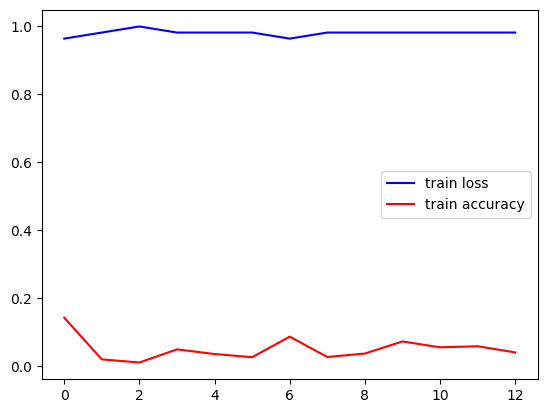

In [24]:
plt.plot(history.history['val_acc'],color='b',label='train loss')
plt.plot(history.history['val_loss'],color='r',label='train accuracy')
plt.legend()
plt.show()

In [25]:
alz_model.evaluate(X_val,y_val)

2/2 [==============================] - 0s 45ms/step - loss: 0.0406 - acc: 0.9821


[0.04055050015449524, 0.9821428060531616]

In [26]:
X_val.shape

(56, 150, 150, 3)

In [28]:
#이러한 구조로 인해 maxpooling 레이어 이후의 특징 추출 능력을 갖게 됩니다. 
#vgg 모델내 데이터로 학습시키고 dense 더붙이기
transfer_vgg16=keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    
)
transfer_vgg16.trainable=False
transfer_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [29]:
finetune_vgg16=keras.Sequential()
finetune_vgg16.add(transfer_vgg16)
finetune_vgg16.add(keras.layers.Flatten())
finetune_vgg16.add(keras.layers.Dense(64,activation='relu'))
finetune_vgg16.add(keras.layers.Dropout(0.3))
finetune_vgg16.add(keras.layers.Dense(1,activation='sigmoid'))
finetune_vgg16.summary()
                   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                524352    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,239,105
Trainable params: 524,417
Non-trainable params: 14,714,688
_________________________________________________________________


In [30]:
finetune_vgg16.compile(loss='binary_crossentropy',optimizer='adam',metrics='acc')
checkpoint=keras.callbacks.ModelCheckpoint(filepath='./new.h5',
                                           save_best_only=True)
early_stopping=keras.callbacks.EarlyStopping(patience=10)
with tf.device('/GPU:0'):
    history=finetune_vgg16.fit(X_train,y_train,epochs=100,batch_size=32,
                      validation_data=(X_val,y_val),
                      callbacks=[checkpoint,early_stopping])

Epoch 1/100
7/7 [==============================] - 6s 822ms/step - loss: 0.9892 - acc: 0.5223 - val_loss: 0.5689 - val_acc: 0.5893
Epoch 2/100
7/7 [==============================] - 4s 536ms/step - loss: 0.7542 - acc: 0.5759 - val_loss: 0.4904 - val_acc: 0.7679
Epoch 3/100
7/7 [==============================] - 4s 598ms/step - loss: 0.5040 - acc: 0.7500 - val_loss: 0.3728 - val_acc: 0.9286
Epoch 4/100
7/7 [==============================] - 4s 572ms/step - loss: 0.4611 - acc: 0.7589 - val_loss: 0.3229 - val_acc: 0.9286
Epoch 5/100
7/7 [==============================] - 4s 569ms/step - loss: 0.3601 - acc: 0.8750 - val_loss: 0.2652 - val_acc: 0.9286
Epoch 6/100
7/7 [==============================] - 4s 552ms/step - loss: 0.2957 - acc: 0.9196 - val_loss: 0.2089 - val_acc: 0.9643
Epoch 7/100
7/7 [==============================] - 4s 590ms/step - loss: 0.2739 - acc: 0.9018 - val_loss: 0.1912 - val_acc: 0.9821
Epoch 8/100
7/7 [==============================] - 4s 564ms/step - loss: 0.2204 - a

In [ ]:
finetune_vgg16.evaluate(X_val, y_val)

2/2 [==============================] - 1s 369ms/step - loss: 0.0944 - acc: 0.9464


[0.09437241405248642, 0.9464285373687744]

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
import numpy as np

model = InceptionV3(weights='imagenet', include_top=False,input_shape=(150,150,3))

model.trainable=False
model.summary()
finetune_V3=keras.Sequential()
finetune_V3.add(model)
finetune_V3.add(keras.layers.Flatten())
finetune_V3.add(keras.layers.Dense(64,activation='relu'))
finetune_V3.add(keras.layers.Dropout(0.3))
finetune_V3.add(keras.layers.Dense(1,activation='sigmoid'))
finetune_V3.summary()
finetune_V3.compile(loss='binary_crossentropy',optimizer='adam',metrics='acc')
checkpoint=keras.callbacks.ModelCheckpoint(filepath='./newV3.h5',
                                           save_best_only=True)
early_stopping=keras.callbacks.EarlyStopping(patience=10)
with tf.device('/GPU:0'):
    history=finetune_V3.fit(X_train,y_train,epochs=100,batch_size=16,
                        validation_data=(X_val,y_val),
                        callbacks=[checkpoint,early_stopping])                   


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_193 (Conv2D)            (None, 74, 74, 32)   864         ['input_8[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_193[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [ ]:
finetune_V3.evaluate(X_val, y_val)

2/2 [==============================] - 0s 127ms/step - loss: 0.1717 - acc: 0.9464


[0.1717037856578827, 0.9464285373687744]